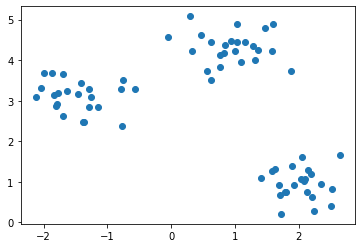

In [16]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generate 3 blobs and store them in X
X, _ = make_blobs(n_samples=70, centers=3, n_features=2, random_state=0, cluster_std=0.4)

# graph the blobs
plt.scatter(X[:, 0], X[:, 1])
plt.show()

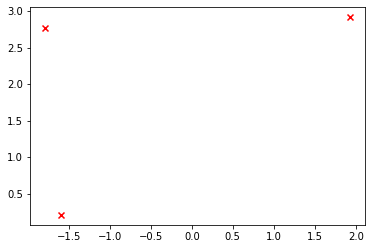

In [17]:
# generate random centers
x1min = np.min(X[:, 0])
x1max = np.max(X[:, 0])
x2min = np.min(X[:, 1])
x2max = np.max(X[:, 1])

tmp_x1 = np.linspace(x1min, x1max, 100)
tmp_x2 = np.linspace(x2min, x2max, 100)

centers_x1 = np.random.choice(tmp_x1, 3)
centers_x2 = np.random.choice(tmp_x2, 3)

centers = np.vstack((centers_x1, centers_x2)).T
centers_old = centers + 10

# calculate the difference between the new centers and old (originially dummy value to get into while loop)
center_shift = np.sum((centers - centers_old)**2)

# graph starting centers
plt.scatter(centers[:, 0], centers[:, 1], marker="x", color="r")
plt.show()

# store initial centers to use later
centers_init = np.copy(centers)

In [18]:
# set threshold to stop iterating
epsilon = 0.1

# get number of points and clusters
numPoints = np.shape(X)[0]
num_clusters = 3

# vector to store class of each point
assignments = np.zeros((numPoints, 1))


while (center_shift > epsilon):
    # update old centers
    centers_old = centers
    # for each point calculate its cluster
    for i in range(numPoints):
        point = X[i, :]
        distances = np.zeros((num_clusters, 1))
    
        # calculate distance to each of the centers of mass
        for c in range(num_clusters):
            distances[c] = np.sum((point - centers[c, :])**2)
        # assign point i to the nearest cluster
        assignments[i] = np.argmin(distances)

        # update centers of mass
        for c in range(num_clusters):
            # grab all indeces of points that fit class c
            indeces_c = np.where(assignments == c)[0]
            try:    
                # compute the new center of mass
                centers[c, :] = np.mean(X[indeces_c, :], axis=0)
            except:
                # in case the class is empty, just do nothing with it
                # bad practice should improve it
                0
    # recompute the shift from old centers to new ones
    center_shift = np.sum((centers - centers_old)**2)

In [19]:
# to prevent off-by-one errors, compute the classes of each point one last time
for i in range(numPoints):
    point = X[i, :]
    distances = np.zeros((num_clusters, 1))

    for c in range(num_clusters):
        distances[c] = np.sum((point - centers[c, :])**2)
    assignments[i] = np.argmin(distances)

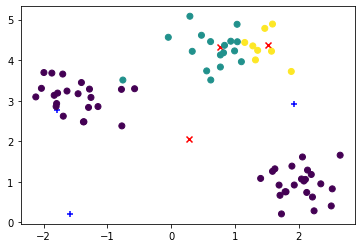

In [20]:
# plot initial centers, new ones, and all the blobs with their own color
plt.scatter(centers[:, 0], centers[:, 1], marker="x", color="r")
plt.scatter(centers_init[:, 0], centers_init[:, 1], marker="+", color="b")
plt.scatter(X[:, 0], X[:, 1], c=assignments)
plt.show()